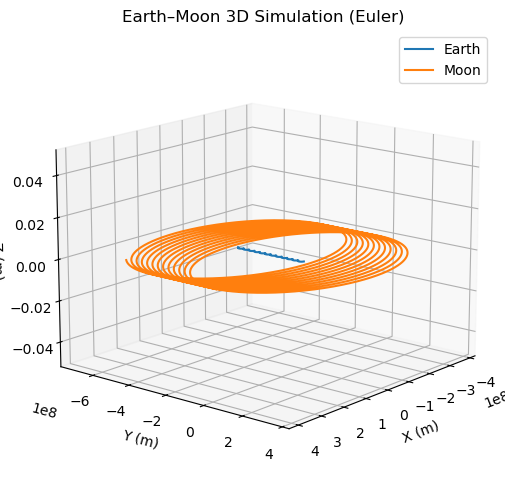

In [2]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # nécessaire pour la 3D

# --- Constantes ---
G = 6.67430e-11             # Constante gravitationnelle
M_EARTH = 5.97219e24        # Masse de la Terre (kg)
M_MOON = 7.3477e22          # Masse de la Lune (kg)

# --- Paramètres initiaux ---
# Positions (en m) - on place la Terre à l'origine
x_earth = 0.0
y_earth = 0.0
z_earth = 0.0

# On place la Lune à ~384 400 km sur l'axe X
# et 0 sur Y, Z
x_moon = 3.844e8
y_moon = 0.0
z_moon = 0.0

# Vitesses initiales (en m/s)
# On donne à la Lune une vitesse ~1,022 km/s
# perpendiculaire à l'axe X, par ex. sur l'axe Y
vx_earth = 0.0
vy_earth = 0.0
vz_earth = 0.0

vx_moon = 0.0
vy_moon = 1.022e3
vz_moon = 0.0

# Paramètres temporels
t = 0.0
dt = 60.0              # 60 s
T_MAX = 27.3 * 24 * 3600  *12# ~27,3 jours en secondes *12

# Listes pour tracer la trajectoire
times = []
earth_x, earth_y, earth_z = [], [], []
moon_x, moon_y, moon_z = [], [], []

while t <= T_MAX:
    # On enregistre l'état
    times.append(t)
    earth_x.append(x_earth)
    earth_y.append(y_earth)
    earth_z.append(z_earth)

    moon_x.append(x_moon)
    moon_y.append(y_moon)
    moon_z.append(z_moon)

    # --- 1) Distance en 3D ---
    dx = x_moon - x_earth
    dy = y_moon - y_earth
    dz = z_moon - z_earth

    r = math.sqrt(dx*dx + dy*dy + dz*dz)
    if r == 0:
        # Collisions ou positions identiques
        force = 0.0
    else:
        # --- 2) Force gravitationnelle scalaire ---
        force = G * M_EARTH * M_MOON / (r*r)

    # --- 3) Composantes de la force ---
    # Vecteur unitaire = (dx/r, dy/r, dz/r)
    if r != 0:
        fx_moon = force * (dx / r)
        fy_moon = force * (dy / r)
        fz_moon = force * (dz / r)
    else:
        fx_moon = 0.0
        fy_moon = 0.0
        fz_moon = 0.0

    # Force sur la Terre = - force sur la Lune (3e loi de Newton)
    fx_earth = -fx_moon
    fy_earth = -fy_moon
    fz_earth = -fz_moon

    # --- 4) Accélérations ---
    ax_moon = fx_moon / M_MOON
    ay_moon = fy_moon / M_MOON
    az_moon = fz_moon / M_MOON

    ax_earth = fx_earth / M_EARTH
    ay_earth = fy_earth / M_EARTH
    az_earth = fz_earth / M_EARTH

    # --- 5) Mise à jour vitesses (Euler) ---
    vx_moon += ax_moon * dt
    vy_moon += ay_moon * dt
    vz_moon += az_moon * dt

    vx_earth += ax_earth * dt
    vy_earth += ay_earth * dt
    vz_earth += az_earth * dt

    # --- 6) Mise à jour positions (Euler) ---
    x_moon += -vx_moon * dt
    y_moon += -vy_moon * dt
    z_moon += -vz_moon * dt

    x_earth += -vx_earth * dt
    y_earth += -vy_earth * dt
    z_earth += -vz_earth * dt

    # --- 7) Avance du temps ---
    t += dt

# ===== Tracé 3D =====
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(earth_x, earth_y, earth_z, label='Earth')
ax.plot(moon_x, moon_y, moon_z, label='Moon')

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title("Earth–Moon 3D Simulation (Euler)")
ax.legend()
ax.view_init(elev=15, azim=40)  # angle de vue (optionnel)
plt.show()
